Load packages

In [49]:
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc

Load Dataset and split

In [50]:

# Load the dataset
df = pd.read_csv('binary.arff.csv')

# Split data into X (features) and Y (target)
X = df.iloc[:, :-1].values  # Features
Y = df.iloc[:, -1].values   # Labels

# Convert categorical labels to binary labels
le = LabelEncoder()
Y = le.fit_transform(Y)  # Encode 'ALL' as 0 and 'AML' as 1


Data Visualization

In [51]:
# head
display(df.head())

# columns
display(df.columns)


,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at,CLASS
0,-342,-200,41,328,-224,-427,-656,-292,137,-144,...,1023,67,214,-135,1074,475,48,168,-70,ALL
1,-87,-248,262,295,-226,-493,367,-452,194,162,...,529,-295,352,-67,67,263,-33,-33,-21,ALL
2,-62,-23,-7,142,-233,-284,-167,-97,-12,-70,...,383,46,104,15,245,164,84,100,-18,ALL
3,22,-153,17,276,-211,-250,55,-141,0,500,...,399,16,558,24,893,297,6,1971,-42,ALL
4,86,-36,-141,252,-201,-384,-420,-197,-60,-468,...,91,-84,615,-52,1235,9,7,1545,-81,ALL


Index(['AFFX-BioB-5_at', 'AFFX-BioB-M_at', 'AFFX-BioB-3_at', 'AFFX-BioC-5_at',
       'AFFX-BioC-3_at', 'AFFX-BioDn-5_at', 'AFFX-BioDn-3_at',
       'AFFX-CreX-5_at', 'AFFX-CreX-3_at', 'AFFX-BioB-5_st',
       ...
       'U58516_at', 'U73738_at', 'X06956_at', 'X16699_at', 'X83863_at',
       'Z17240_at', 'L49218_f_at', 'M71243_f_at', 'Z78285_f_at', 'CLASS'],
      dtype='object', length=7130)

SVM

In [52]:
# Split the dataset into training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Build the model
svm = SVC(kernel='rbf')

# Train the model
svm.fit(X_train, Y_train)

# Predict the labels for the test set
Y_pred = svm.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))


Accuracy: 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.75      0.86         4

    accuracy                           0.93        15
   macro avg       0.96      0.88      0.91        15
weighted avg       0.94      0.93      0.93        15

Confusion Matrix:
[[11  0]
 [ 1  3]]


Confusion Matrix

Confusion Matrix:
[[11  0]
 [ 1  3]]


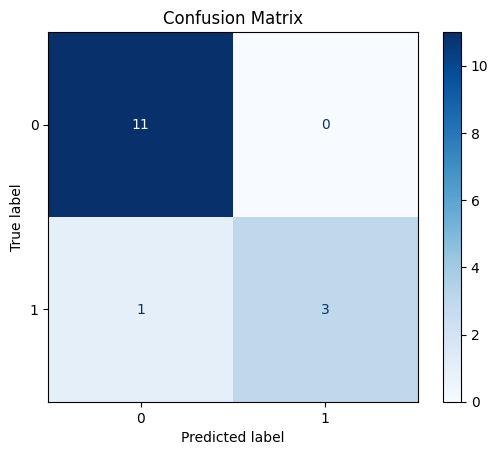

In [53]:
from sklearn import metrics
# Calculate confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')

plt.title('Confusion Matrix')
plt.show()

Cross Validation Score for SVM

In [54]:
# Perform n-fold cross-validation
n = 2
cv_scores = cross_val_score(svm, X, Y, cv=n)

# Print cross-validation scores
print("Cross-validation Scores:", cv_scores)
print("Mean Cross-validation Accuracy:", cv_scores.mean())

Cross-validation Scores: [0.77777778 0.72222222]
Mean Cross-validation Accuracy: 0.75


Cross Validation Graph


Cross-validation Scores: [0.77777778 0.72222222]
Mean Cross-validation Accuracy: 0.75


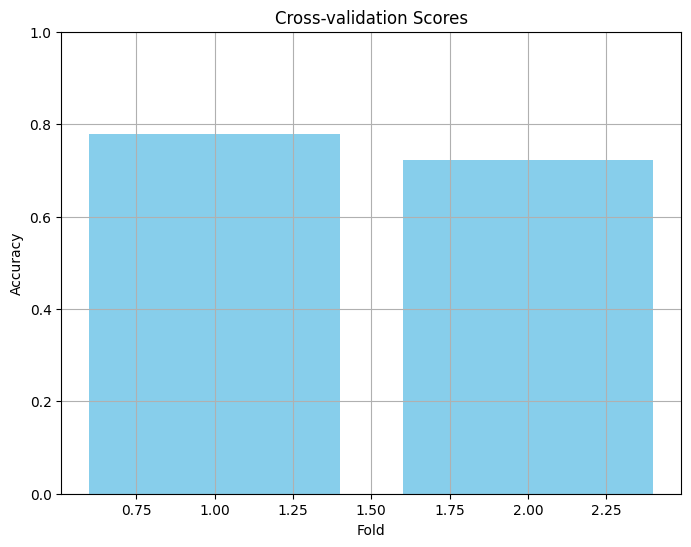

In [55]:
# Print cross-validation scores
print("\nCross-validation Scores:", cv_scores)
print("Mean Cross-validation Accuracy:", cv_scores.mean())

# Plot Cross-validation Scores
plt.figure(figsize=(8, 6))
plt.bar(range(1, n + 1), cv_scores, color='skyblue')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-validation Scores')
plt.ylim(0, 1)  # Limit y-axis to 0-1 for accuracy scores
plt.grid(True)
plt.show()

ROC-AUC

ROC-AUC: 0.8750


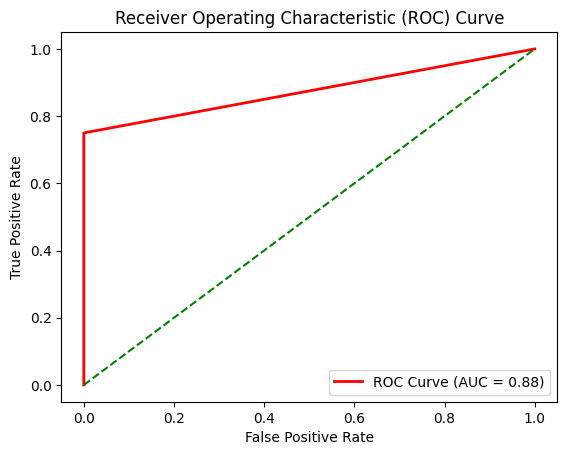

In [56]:

# Calculate ROC AUC score
roc_auc = metrics.roc_auc_score(Y_test, Y_pred)
print(f"ROC-AUC: {roc_auc:.4f}")

# Plot ROC curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred)
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



Classificaion Report

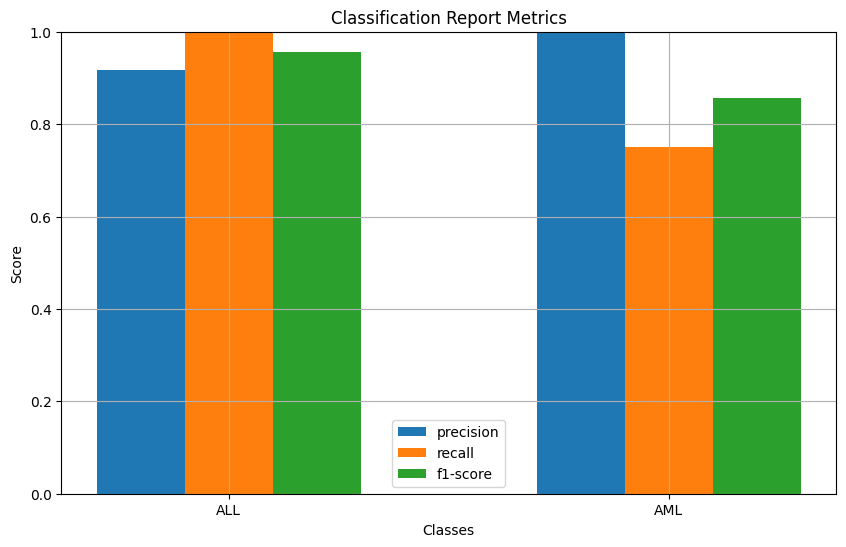

In [57]:
# Get the classification report
classification_rep = classification_report(Y_test, Y_pred, target_names=le.classes_, output_dict=True)

# Extract precision, recall, and f1-score values
metrics = ['precision', 'recall', 'f1-score']
classes = list(le.classes_)
values = {metric: [classification_rep[class_name][metric] for class_name in classes] for metric in metrics}

# Plotting
plt.figure(figsize=(10, 6))

# Bar positions and width
bar_width = 0.2
index = range(len(classes))

# Plot bars for each metric
for i, metric in enumerate(metrics):
    plt.bar([pos + i * bar_width for pos in index], values[metric], bar_width, label=metric)

plt.xlabel('Classes')
plt.ylabel('Score')
plt.title('Classification Report Metrics')
plt.xticks([pos + bar_width for pos in index], classes)
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

Random Forest

In [76]:
# Split the dataset into training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Build the Random Forest model
rf = RandomForestClassifier(n_estimators=13, random_state=13)

# Train the model
rf.fit(X_train, Y_train)

# Predict the labels for the test set
Y_pred = rf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

Accuracy: 0.8666666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.85      0.85      0.85        15
weighted avg       0.87      0.87      0.87        15

Confusion Matrix:
[[9 1]
 [1 4]]


Confusion Matrix

Confusion Matrix:
[[10  1]
 [ 1  3]]


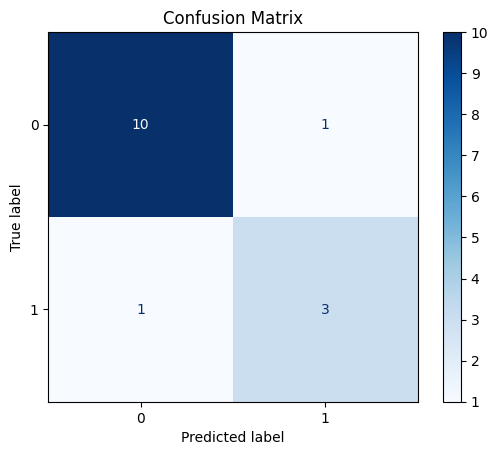

In [59]:
from sklearn import metrics
# Calculate confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')

plt.title('Confusion Matrix')
plt.show()

Cross Validation Score for Random Forest

In [60]:
# Perform n-fold cross-validation
n = 5
cv_scores = cross_val_score(rf, X, Y, cv=n)

# Print cross-validation scores
print("Cross-validation Scores:", cv_scores)
print("Mean Cross-validation Accuracy:", cv_scores.mean())

Cross-validation Scores: [0.93333333 0.8        0.85714286 0.85714286 0.92857143]
Mean Cross-validation Accuracy: 0.8752380952380954


Cross Validation graph


Cross-validation Scores: [0.93333333 0.8        0.85714286 0.85714286 0.92857143]
Mean Cross-validation Accuracy: 0.8752380952380954


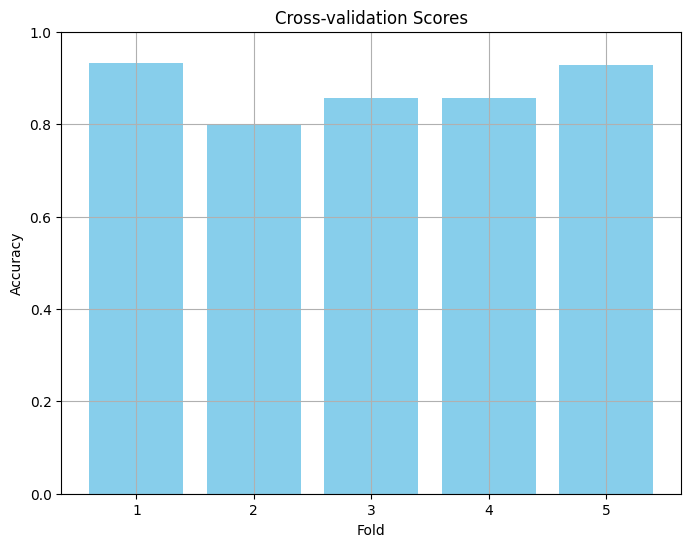

In [61]:
# Print cross-validation scores
print("\nCross-validation Scores:", cv_scores)
print("Mean Cross-validation Accuracy:", cv_scores.mean())

# Plot Cross-validation Scores
plt.figure(figsize=(8, 6))
plt.bar(range(1, n + 1), cv_scores, color='skyblue')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-validation Scores')
plt.ylim(0, 1)  # Limit y-axis to 0-1 for accuracy scores
plt.grid(True)
plt.show()

ROC-AUC

ROC-AUC: 0.8295


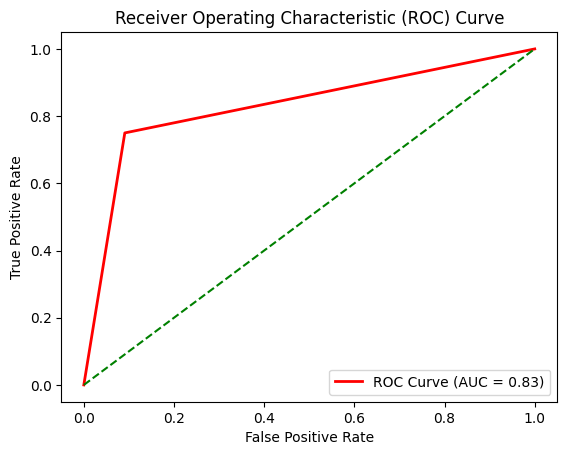

In [62]:

# Calculate ROC AUC score
roc_auc = metrics.roc_auc_score(Y_test, Y_pred)
print(f"ROC-AUC: {roc_auc:.4f}")

# Plot ROC curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred)
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



Classification report

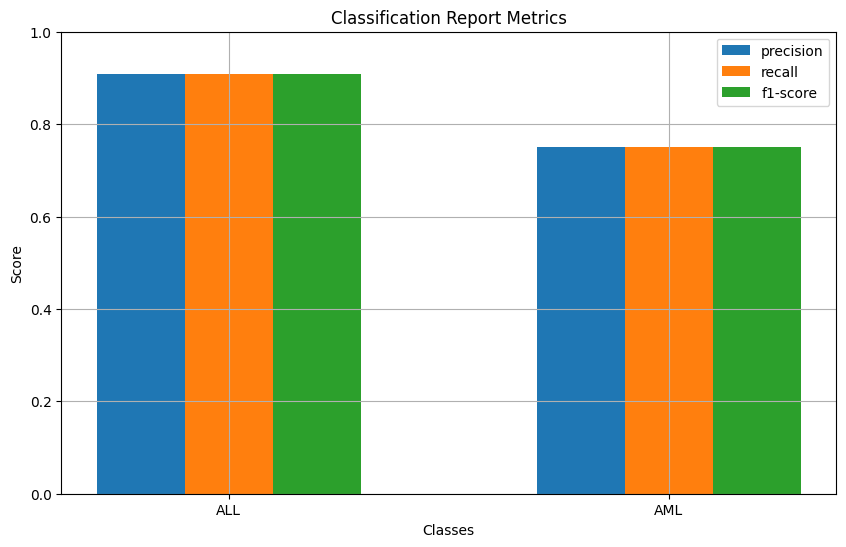

In [63]:
# Get the classification report
classification_rep = classification_report(Y_test, Y_pred, target_names=le.classes_, output_dict=True)

# Extract precision, recall, and f1-score values
metrics = ['precision', 'recall', 'f1-score']
classes = list(le.classes_)
values = {metric: [classification_rep[class_name][metric] for class_name in classes] for metric in metrics}

# Plotting
plt.figure(figsize=(10, 6))

# Bar positions and width
bar_width = 0.2
index = range(len(classes))

# Plot bars for each metric
for i, metric in enumerate(metrics):
    plt.bar([pos + i * bar_width for pos in index], values[metric], bar_width, label=metric)

plt.xlabel('Classes')
plt.ylabel('Score')
plt.title('Classification Report Metrics')
plt.xticks([pos + bar_width for pos in index], classes)
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

Mutual Information:


In [64]:
from sklearn.feature_selection import mutual_info_classif
import numpy as np

# Compute mutual information between each feature and the target
mi = mutual_info_classif(X, Y)

# Sort features based on mutual information
mi_sorted_indices = np.argsort(mi)[::-1]  # Sort in descending order

# Get top 10 features based on mutual information
top_10_mi_features = df.columns[mi_sorted_indices[:50]]

print("Top 10 features based on Mutual Information:")
print(top_10_mi_features)



Top 10 features based on Mutual Information:
Index(['M23197_at', 'X95735_at', 'M27891_at', 'M31523_at', 'L09209_s_at',
       'D88422_at', 'M84526_at', 'U46499_at', 'M11722_at', 'M12959_s_at',
       'X62654_rna1_at', 'M92287_at', 'X62320_at', 'M83652_s_at', 'J05243_at',
       'M96326_rna1_at', 'M63138_at', 'M63379_at', 'X17042_at',
       'U22376_cds2_s_at', 'X59417_at', 'M16038_at', 'U05259_rna1_at',
       'Z49194_at', 'X61587_at', 'Z15115_at', 'S82470_at', 'D21262_at',
       'M19507_at', 'X90858_at', 'M89957_at', 'M29696_at', 'M14636_at',
       'L47738_at', 'D88270_at', 'M32304_s_at', 'M22960_at',
       'X97267_rna1_s_at', 'D10495_at', 'M29474_at', 'J03077_s_at',
       'M11147_at', 'M83667_rna1_s_at', 'M84371_rna1_s_at', 'X52056_at',
       'HG1612-HT1612_at', 'M31211_s_at', 'M33680_at', 'M63959_at',
       'X07743_at'],
      dtype='object')


Anova F-test

In [65]:
from sklearn.feature_selection import f_classif

# Perform ANOVA F-test
f_scores, p_values = f_classif(X, Y)

# Sort features based on F-scores
f_sorted_indices = np.argsort(f_scores)[::-1]

# Get top 10 features based on ANOVA F-test (for example)
top_10_f_features = df.columns[f_sorted_indices[:50]]

print("Top 10 features based on ANOVA F-test:")
print(top_10_f_features)


Top 10 features based on ANOVA F-test:
Index(['X95735_at', 'X17042_at', 'M23197_at', 'M84526_at', 'L09209_s_at',
       'U46499_at', 'M27891_at', 'M16038_at', 'M22960_at', 'M63138_at',
       'M55150_at', 'M62762_at', 'U50136_rna1_at', 'X61587_at', 'X16546_at',
       'M11147_at', 'M32304_s_at', 'X52056_at', 'D49950_at', 'M19507_at',
       'X59417_at', 'X14008_rna1_f_at', 'M81695_s_at', 'X62654_rna1_at',
       'M31211_s_at', 'M92287_at', 'X64072_s_at', 'M96326_rna1_at',
       'L09717_at', 'J03801_f_at', 'M19045_f_at', 'M31523_at', 'Y00787_s_at',
       'Y07604_at', 'M83652_s_at', 'U82759_at', 'U05259_rna1_at', 'L42379_at',
       'M84371_rna1_s_at', 'D14664_at', 'D88422_at', 'J05243_at', 'M93056_at',
       'U10868_at', 'HG1612-HT1612_at', 'L11669_at', 'S50223_at', 'L41559_at',
       'D10495_at', 'U46751_at'],
      dtype='object')


Chi-Square Test

In [66]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

# Chi-square test requires non-negative values, so we scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Perform Chi-Square test
chi_scores, p_values = chi2(X_scaled, Y)

# Sort features based on Chi-square scores
chi_sorted_indices = np.argsort(chi_scores)[::-1]

# Get top 10 features based on Chi-square test (for example)
top_10_chi_features = df.columns[chi_sorted_indices[:50]]

print("Top 10 features based on Chi-Square Test:")
print(top_10_chi_features)


Top 10 features based on Chi-Square Test:
Index(['M27891_at', 'Y00787_s_at', 'U46499_at', 'D88422_at', 'M19507_at',
       'X17042_at', 'M23197_at', 'M84526_at', 'M16038_at', 'X95735_at',
       'L09209_s_at', 'M63138_at', 'X14008_rna1_f_at', 'M96326_rna1_at',
       'K01396_at', 'M19045_f_at', 'M28130_rna1_s_at', 'D88270_at',
       'X16546_at', 'J03801_f_at', 'M11722_at', 'X62320_at', 'M22960_at',
       'M81695_s_at', 'M57710_at', 'M21119_s_at', 'HG3494-HT3688_at',
       'U05259_rna1_at', 'X82240_rna1_at', 'M92287_at', 'M33195_at',
       'M15395_at', 'U16306_at', 'U02020_at', 'HG2981-HT3127_s_at',
       'M98399_s_at', 'X64072_s_at', 'U46751_at', 'J03909_at', 'M63379_at',
       'M11147_at', 'J04990_at', 'X59417_at', 'X61587_at', 'D49950_at',
       'U50136_rna1_at', 'L09717_at', 'M83652_s_at', 'M31523_at',
       'M33493_s_at'],
      dtype='object')


Convert Top Feature Names to Indices

In [67]:
# Convert column names to indices
def get_feature_indices(df, top_features):
    return [df.columns.get_loc(feature) for feature in top_features]

# Get top 10 features for each selection technique
top_10_mi_indices = get_feature_indices(df, top_10_mi_features)
top_10_f_indices = get_feature_indices(df, top_10_f_features)
top_10_chi_indices = get_feature_indices(df, top_10_chi_features)


SVM Model Performance After Filter Feature Selection

In [74]:
# Define the function to evaluate the SVM model
def evaluate_svm(X, Y, top_features, technique_name):
    # Filter the dataset with the top features
    X_selected = X[:, top_features]
    
    # Split the dataset into training and test data
    X_train, X_test, Y_train, Y_test = train_test_split(X_selected, Y, test_size=0.2)
    
    # Build the SVM model
    svm = SVC(kernel='rbf')
    
    # Train the model
    svm.fit(X_train, Y_train)
    
    # Predict the labels for the test set
    Y_pred = svm.predict(X_test)
    
    # Calculate the accuracy
    accuracy = accuracy_score(Y_test, Y_pred)
    
    # Calculate ROC AUC score
    roc_auc = roc_auc_score(Y_test, Y_pred)
    
    # Print classification report
    classification_rep = classification_report(Y_test, Y_pred)
    
    # Print confusion matrix
    conf_matrix = confusion_matrix(Y_test, Y_pred)
    
    # Display the metrics with the technique name
    print(f"SVM Performance using {technique_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print("\nClassification Report:\n", classification_rep)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\n")

# Evaluate SVM using the top 10 features selected by Mutual Information
evaluate_svm(X, Y, top_10_mi_indices, "Mutual Information")

# Evaluate SVM using the top 10 features selected by F-Score
evaluate_svm(X, Y, top_10_f_indices, "F-Score")

# Evaluate SVM using the top 10 features selected by Chi-Square
evaluate_svm(X, Y, top_10_chi_indices, "Chi-Square")

# dbscan: algo


SVM Performance using Mutual Information:
Accuracy: 1.0000
ROC-AUC: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         4

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

Confusion Matrix:
[[11  0]
 [ 0  4]]


SVM Performance using F-Score:
Accuracy: 1.0000
ROC-AUC: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         4

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

Confusion Matrix:
[[11  0]
 [ 0  4]]


SVM Performance using Chi-Square:
Accuracy: 0.9333
ROC-AUC: 0.9286

Classificat

Random Forest Model Performance After Filter Feature Selection

In [77]:
# Define the function to evaluate the Random Forest model
def evaluate_rf(X, Y, top_features, technique_name):
    # Filter the dataset with the top features
    X_selected = X[:, top_features]
    
    # Split the dataset into training and test data
    X_train, X_test, Y_train, Y_test = train_test_split(X_selected, Y, test_size=0.2)
    
    # Build the Random Forest model
    rf = RandomForestClassifier(n_estimators=13, random_state=13)
    
    # Train the model
    rf.fit(X_train, Y_train)
    
    # Predict the labels for the test set
    Y_pred = rf.predict(X_test)
    
    # Calculate the accuracy
    accuracy = accuracy_score(Y_test, Y_pred)
    
    # Calculate ROC AUC score
    roc_auc = roc_auc_score(Y_test, Y_pred)
    
    # Print classification report
    classification_rep = classification_report(Y_test, Y_pred)
    
    # Print confusion matrix
    conf_matrix = confusion_matrix(Y_test, Y_pred)
    
    # Display the metrics with the technique name
    print(f"Random Forest Performance using {technique_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print("\nClassification Report:\n", classification_rep)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\n")

# Evaluate Random Forest using the top 10 features selected by Mutual Information
evaluate_rf(X, Y, top_10_mi_indices, "Mutual Information")

# Evaluate Random Forest using the top 10 features selected by F-Score
evaluate_rf(X, Y, top_10_f_indices, "F-Score")

# Evaluate Random Forest using the top 10 features selected by Chi-Square
evaluate_rf(X, Y, top_10_chi_indices, "Chi-Square")


Random Forest Performance using Mutual Information:
Accuracy: 1.0000
ROC-AUC: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         6

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

Confusion Matrix:
[[9 0]
 [0 6]]


Random Forest Performance using F-Score:
Accuracy: 0.9333
ROC-AUC: 0.9545

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.80      1.00      0.89         4

    accuracy                           0.93        15
   macro avg       0.90      0.95      0.92        15
weighted avg       0.95      0.93      0.94        15

Confusion Matrix:
[[10  1]
 [ 0  4]]


Random Forest Performance using Chi-Square:
Accuracy: 1.0000
RO

SVM Model Performance after Filter Feature Selection

In [80]:
# Define the function to evaluate the SVM model after feature selection
def evaluate_svm_after_selection(X, Y, top_features, technique_name):
    # Filter the dataset with the top features
    X_selected = X[:, top_features]
    
    # Split the dataset into training and test data
    X_train, X_test, Y_train, Y_test = train_test_split(X_selected, Y, test_size=0.2)
    
    # Build the SVM model
    svm = SVC(kernel='rbf')
    
    # Train the model
    svm.fit(X_train, Y_train)
    
    # Predict the labels for the test set
    Y_pred = svm.predict(X_test)
    
    # Calculate the accuracy
    accuracy = accuracy_score(Y_test, Y_pred)
    
    # Calculate ROC AUC score
    roc_auc = roc_auc_score(Y_test, Y_pred)
    
    # Print classification report
    classification_rep = classification_report(Y_test, Y_pred)
    
    # Print confusion matrix
    conf_matrix = confusion_matrix(Y_test, Y_pred)
    
    # Display the metrics with the technique name
    print(f"SVM Performance using {technique_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print("\nClassification Report:\n", classification_rep)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\n")

# Evaluate SVM using the top 10 features selected by Mutual Information
evaluate_svm_after_selection(X, Y, top_10_mi_indices, "Mutual Information")

# Evaluate SVM using the top 10 features selected by F-Score
evaluate_svm_after_selection(X, Y, top_10_f_indices, "F-Score")

# Evaluate SVM using the top 10 features selected by Chi-Square
evaluate_svm_after_selection(X, Y, top_10_chi_indices, "Chi-Square")


SVM Performance using Mutual Information:
Accuracy: 0.9333
ROC-AUC: 0.9000

Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.95      0.90      0.92        15
weighted avg       0.94      0.93      0.93        15

Confusion Matrix:
[[10  0]
 [ 1  4]]


SVM Performance using F-Score:
Accuracy: 1.0000
ROC-AUC: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         4

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

Confusion Matrix:
[[11  0]
 [ 0  4]]


SVM Performance using Chi-Square:
Accuracy: 1.0000
ROC-AUC: 1.0000

Classificat